In [3]:
#Import libraries..
import pandas as pd
import re
import matplotlib.pyplot as plt
#
("Successfully import pandas libraries")


'Successfully import pandas libraries'

In [4]:
#import dataset from path location to jupyter notebook
df = pd.read_csv(
    r"C:\Users\Ajay\OneDrive\Desktop\CodeAlpha_Tasks\Sentiment_Analysis.csv",
    encoding="latin1"
)
#The file caused a unicodeDecodeError because it was not in utf-8 format ,this was fixed by using encoding="latin1"
print(df.head())

                                        text sentiment
0                        I love this product  positive
1          This is the worst purchase I made  negative
2                              It works fine   neutral
3          Amazing quality and fast delivery  positive
4  Terrible experience with customer support  negative


In [5]:
#now display the information of the data set ..
print(df.info())
print(df['sentiment'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       50 non-null     object
 1   sentiment  50 non-null     object
dtypes: object(2)
memory usage: 932.0+ bytes
None
sentiment
positive    17
negative    17
neutral     16
Name: count, dtype: int64


In [6]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_text'] = df['text'].apply(clean_text)

print(df[['text', 'clean_text']].head())


                                        text  \
0                        I love this product   
1          This is the worst purchase I made   
2                              It works fine   
3          Amazing quality and fast delivery   
4  Terrible experience with customer support   

                                  clean_text  
0                        i love this product  
1          this is the worst purchase i made  
2                              it works fine  
3          amazing quality and fast delivery  
4  terrible experience with customer support  


In [7]:
from textblob import TextBlob
print("TextBlob installed successfully")


TextBlob installed successfully


In [8]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

df['predicted_sentiment'] = df['clean_text'].apply(get_sentiment)

print(df[['text', 'sentiment', 'predicted_sentiment']].head())


                                        text sentiment predicted_sentiment
0                        I love this product  positive            positive
1          This is the worst purchase I made  negative            negative
2                              It works fine   neutral            positive
3          Amazing quality and fast delivery  positive            positive
4  Terrible experience with customer support  negative            negative


In [9]:
from sklearn.metrics import classification_report

print(classification_report(df['sentiment'], df['predicted_sentiment']))


              precision    recall  f1-score   support

    negative       0.81      0.76      0.79        17
     neutral       0.43      0.19      0.26        16
    positive       0.56      0.88      0.68        17

    accuracy                           0.62        50
   macro avg       0.60      0.61      0.58        50
weighted avg       0.60      0.62      0.58        50



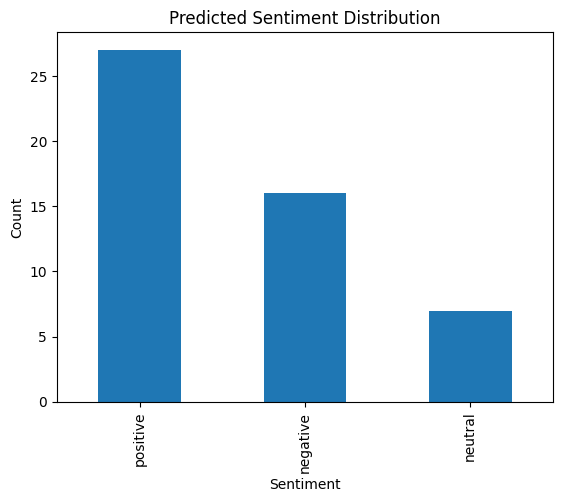

In [11]:
df['predicted_sentiment'].value_counts().plot(kind='bar')
plt.title("Predicted Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [15]:
df.to_csv("C:\\Users\\Ajay\\OneDrive\\Desktop\\CodeAlpha_Tasks\\Sentiment__Analysis_Task3.csv",index=False)
("Successfully saved in file folder")

'Successfully saved in file folder'